In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify
import plotly.express as px


In [165]:
data = pd.read_csv('netflix_titles.csv')
print(data.shape)

(7787, 12)


In [166]:
#CSV Data Visualization
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [167]:
data.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.0,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3


In [168]:
# Rellena los valores faltantes en todo el DataFrame data con la cadena 'NULL'.
data = data.fillna('NULL')
# Extrae el año de la columna 'date_added' y lo coloca en una nueva columna 'year_added'.
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
# Reemplaza cualquier 'NULL' en 'year_added' por '2020'.
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
# Convierte los valores de 'year_added' a enteros.
data['year_added'] = data['year_added'].apply(int)

In [169]:
# Crear dos rubros de la misma data para poder analizarla mejor, dividirla en Movies y en TV Shows
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

In [170]:
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020


In [171]:
df=movie
df.groupby('rating').nunique()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,year_added
rating,,,,,,,,,,,,
G,39,1,39,36,39,11,26,25,25,16,39,8
NC-17,3,1,3,3,3,3,3,3,3,3,3,3
NR,79,1,79,79,63,30,66,20,44,34,79,7
NULL,5,1,5,3,3,3,5,3,5,2,5,2
PG,247,1,247,210,242,62,159,43,61,72,246,10
PG-13,386,1,386,327,378,102,207,40,82,102,385,7
R,663,1,663,544,654,157,374,48,88,109,663,8
TV-14,1272,1,1272,1011,1140,144,543,62,158,118,1265,9
TV-G,111,1,111,93,89,31,85,15,63,36,110,8


In [172]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NULL,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017
11,s12,TV Show,1983,NULL,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018
12,s13,TV Show,1994,Diego Enrique Osorno,NULL,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019
16,s17,TV Show,Feb-09,NULL,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NULL,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019


In [173]:
df=tv_show
df.groupby('rating').nunique()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,year_added
rating,,,,,,,,,,,,
NR,5,1,5,1,5,3,4,3,3,5,5,3
NULL,2,1,2,1,2,2,2,2,1,2,2,2
R,2,1,2,2,2,2,2,2,1,2,2,2
TV-14,659,1,659,47,600,65,413,30,14,137,659,8
TV-G,83,1,83,5,65,18,74,21,7,32,83,8
TV-MA,1018,1,1018,94,882,103,571,24,12,151,1018,10
TV-PG,301,1,301,21,239,35,209,28,10,84,301,8
TV-Y,163,1,163,8,136,46,130,17,7,10,161,8
TV-Y7,176,1,176,9,163,46,132,29,8,18,176,7


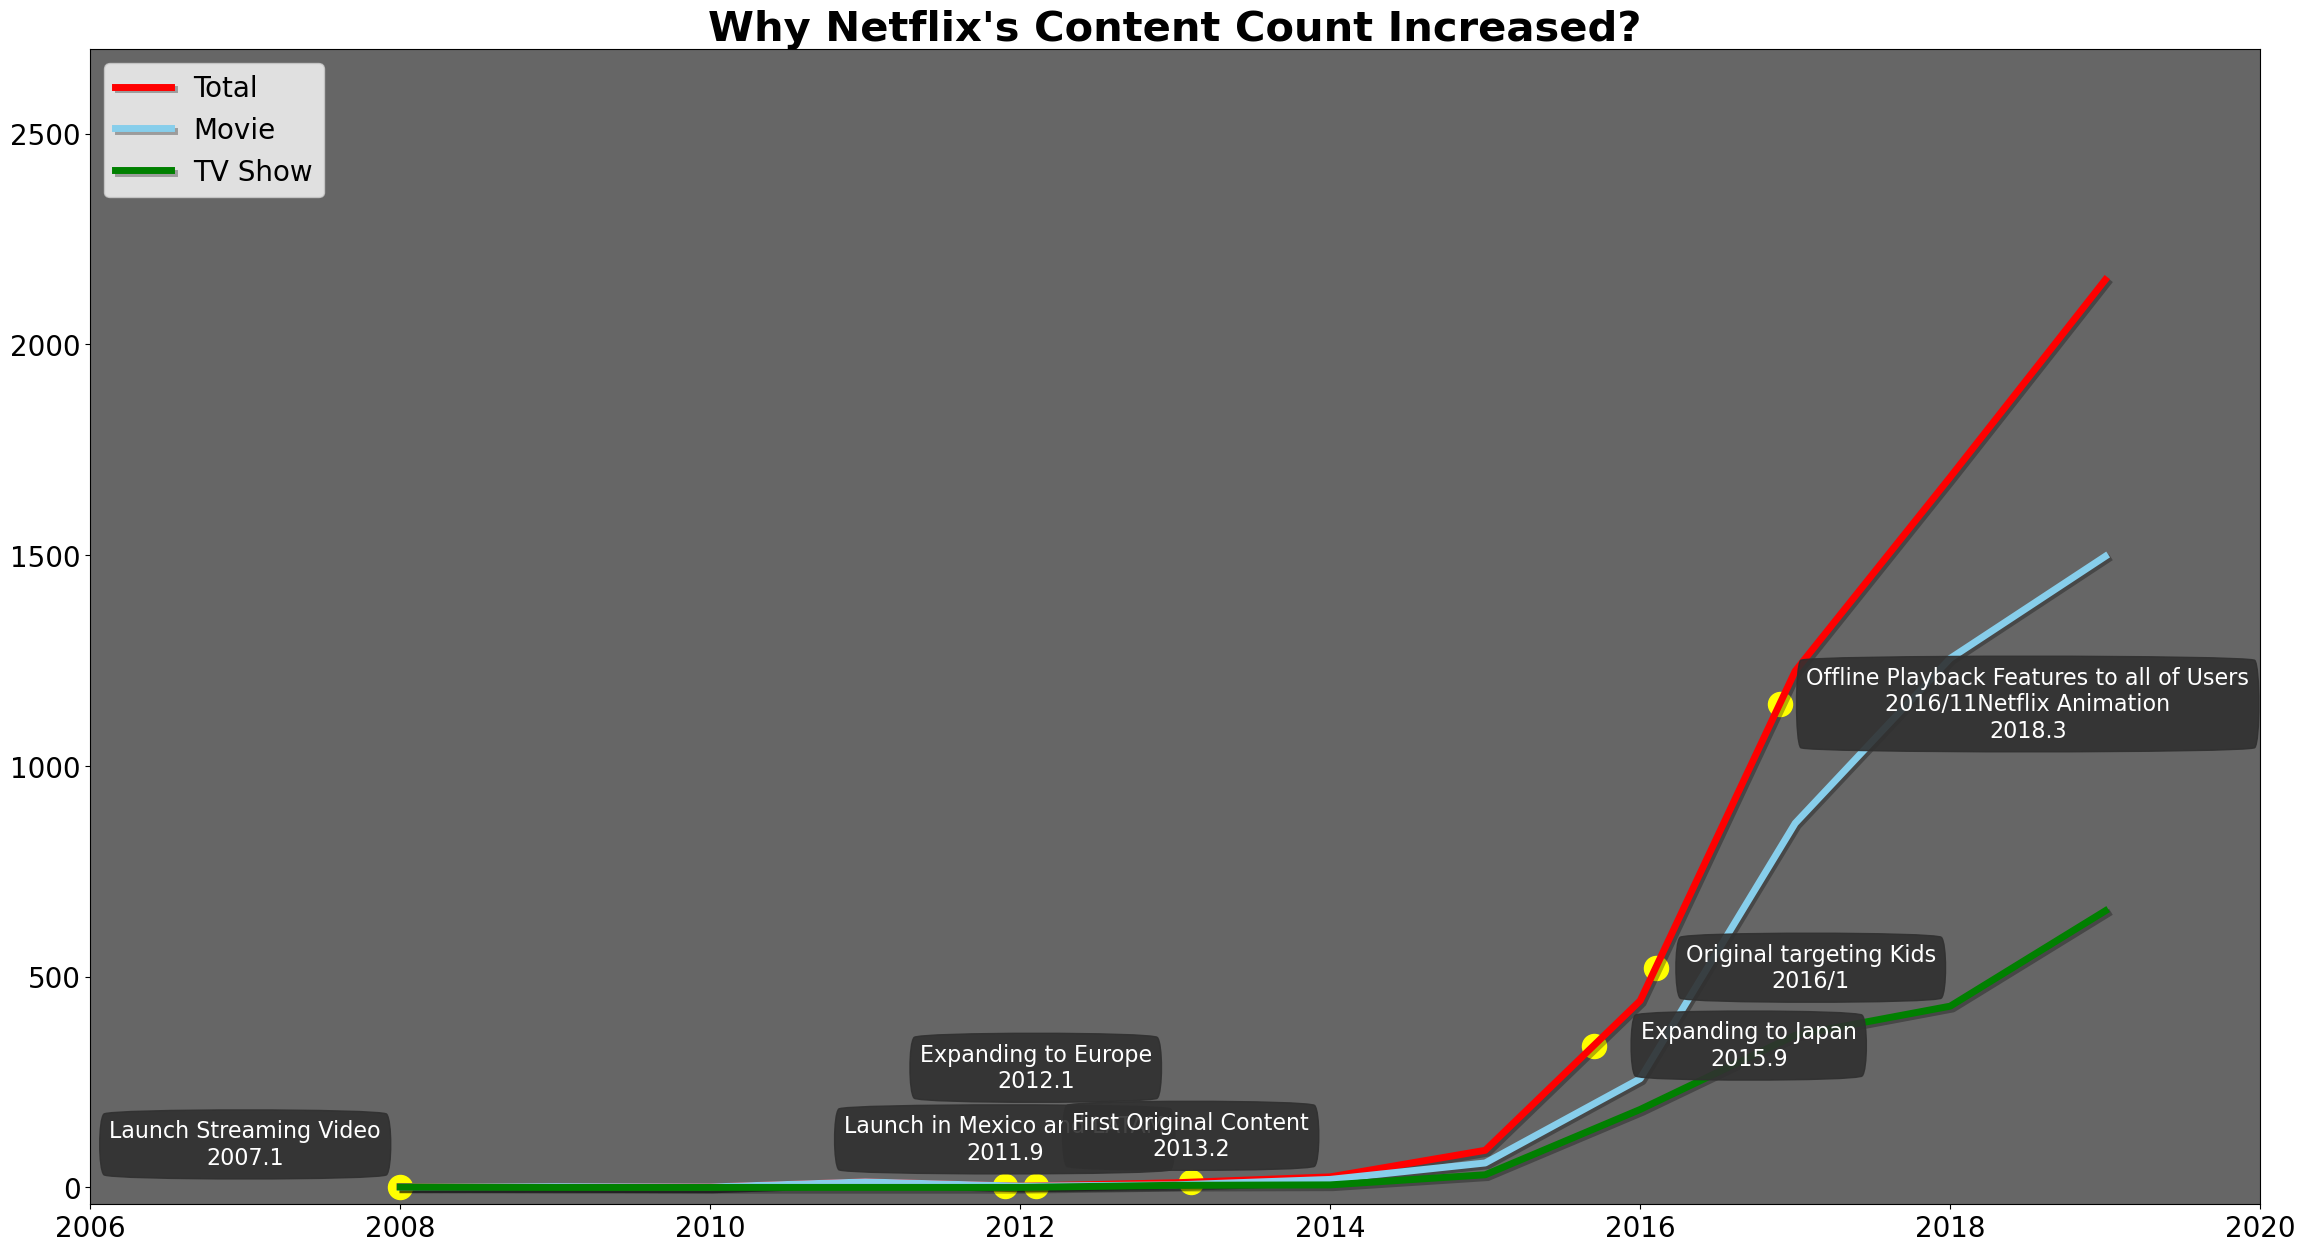

In [174]:
import matplotlib.patheffects as path_effects
year_data = data['year_added'].value_counts().sort_index().loc[:2019]
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="red", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='green', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2011.9,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9,
    2018.3,
]

events = [
    "Launch Streaming Video\n2007.1",
    "Launch in Mexico and LATAM\n2011.9",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
    "Netflix Animation\n2018.3"
]

up_down = [100, 110, 280, 110, 0, 0, 0, 200]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6, 0 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='yellow', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Content Count Increased?", position=(0.5, 1.0+0.05), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

In [175]:
#Which country produces more content
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

tot = sum(country_counting)
top20 = sum(country_counting[:20])

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 9067
top 20 countries : 7879
percentage : 7879/9067 = 86.8975405315981


In [176]:
top20_country = country_counting[:20]
top20_country.head()

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
dtype: int64

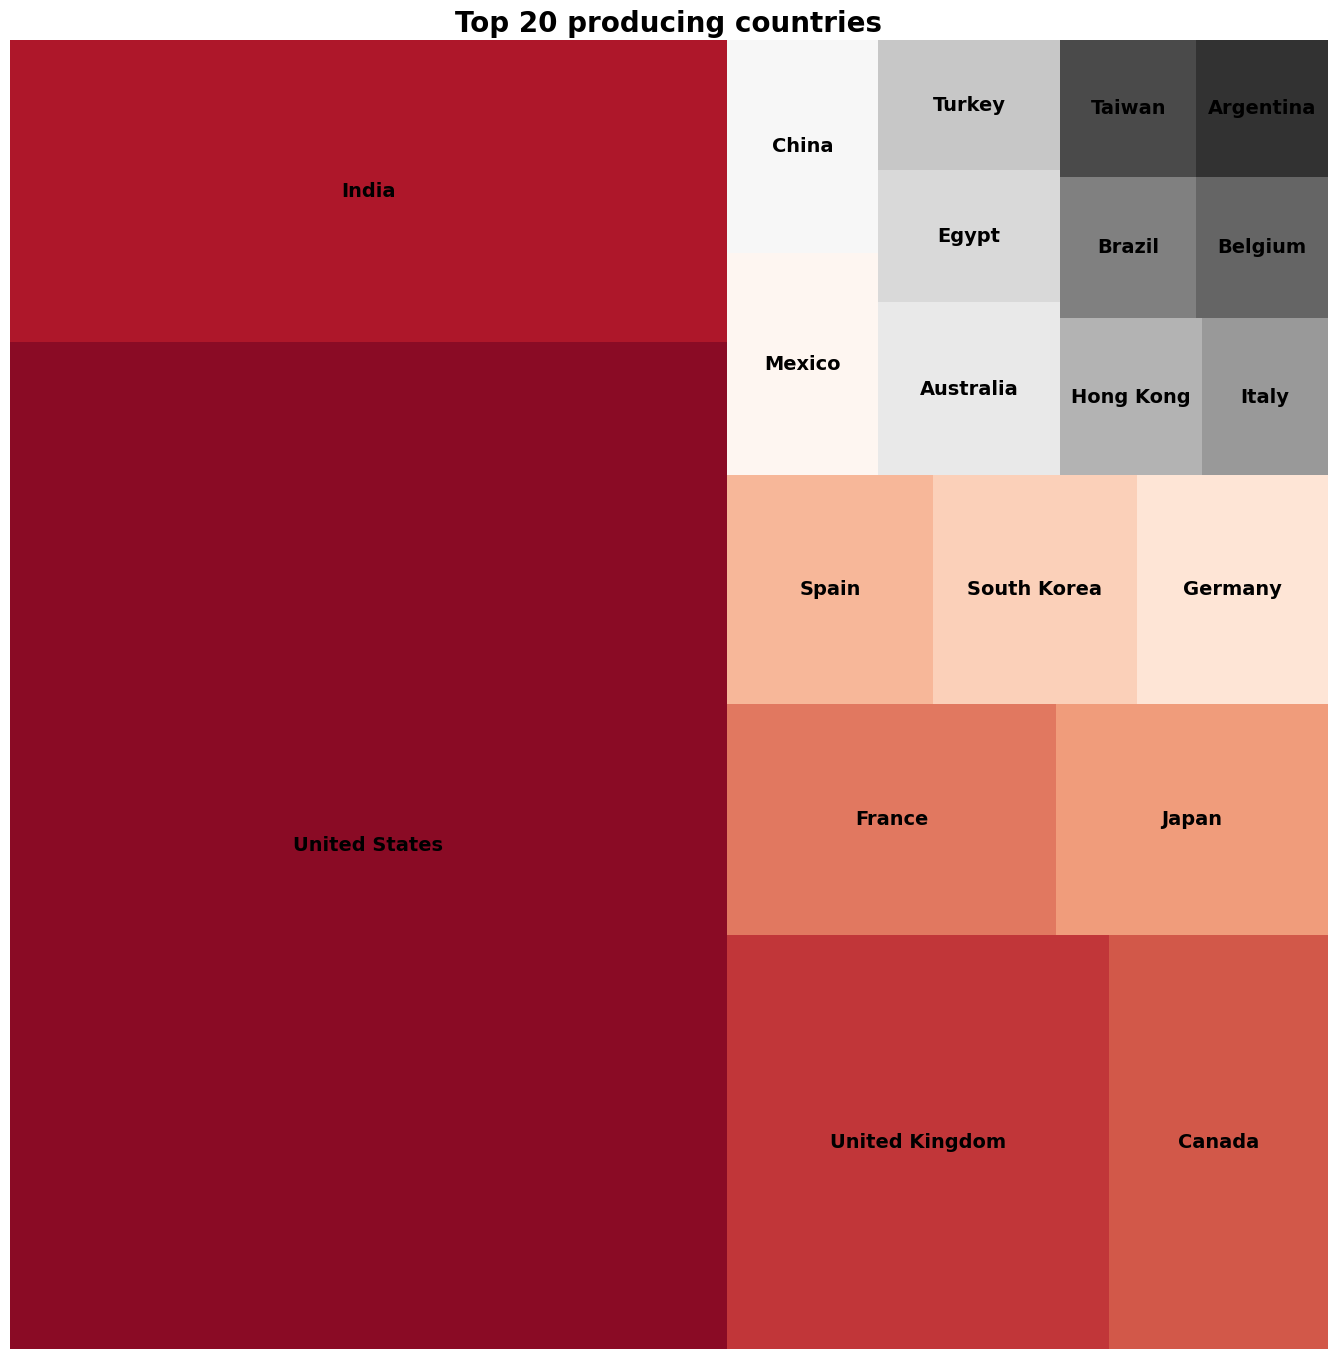

In [177]:
import matplotlib.pyplot as plt
import squarify
y = top20_country
fig = plt.figure(figsize=(17, 17))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

In [178]:
import plotly.express as px
year_country = data.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()

In [179]:
# Example movie and tv_show datasets (hypothetical)
movie_data = {'rating': ['G','NC-17','NR', 'PG', 'PG-13', 'R', 'TV-14','TV-G','TV-MA','TV-PG','TV-Y','TV-Y7','TV-Y7-FV','UR']}
tv_show_data = {'rating': ['NR','R','TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-14','TV-MA','TV-PG']}

movie = pd.DataFrame(movie_data)
tv_show = pd.DataFrame(tv_show_data)

# Define rating order
rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Calculate ratings counts with reindexing
movie_rating = movie['rating'].nunique()
tv_rating = tv_show['rating'].nunique()

print("Movie Ratings:")
print(movie_rating)
print("\nTV Show Ratings:")
print(tv_rating)

Movie Ratings:
14

TV Show Ratings:
9


AttributeError: 'int' object has no attribute 'index'

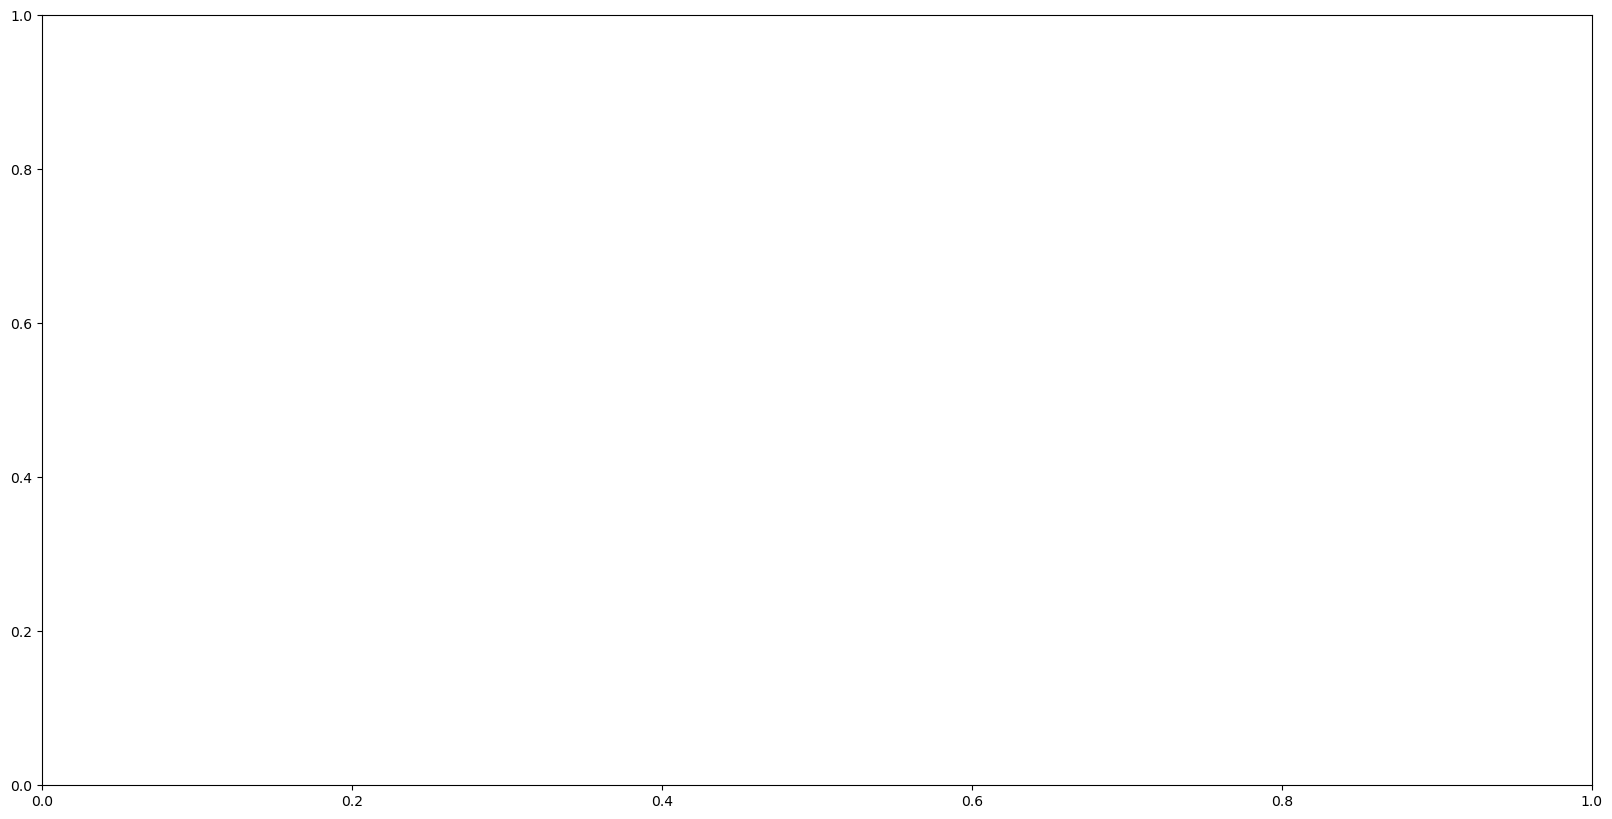

In [180]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()
rating_barplot(movie_rating,'Movie', 1200)
rating_barplot(tv_rating,'TV Show' , 700, 800)

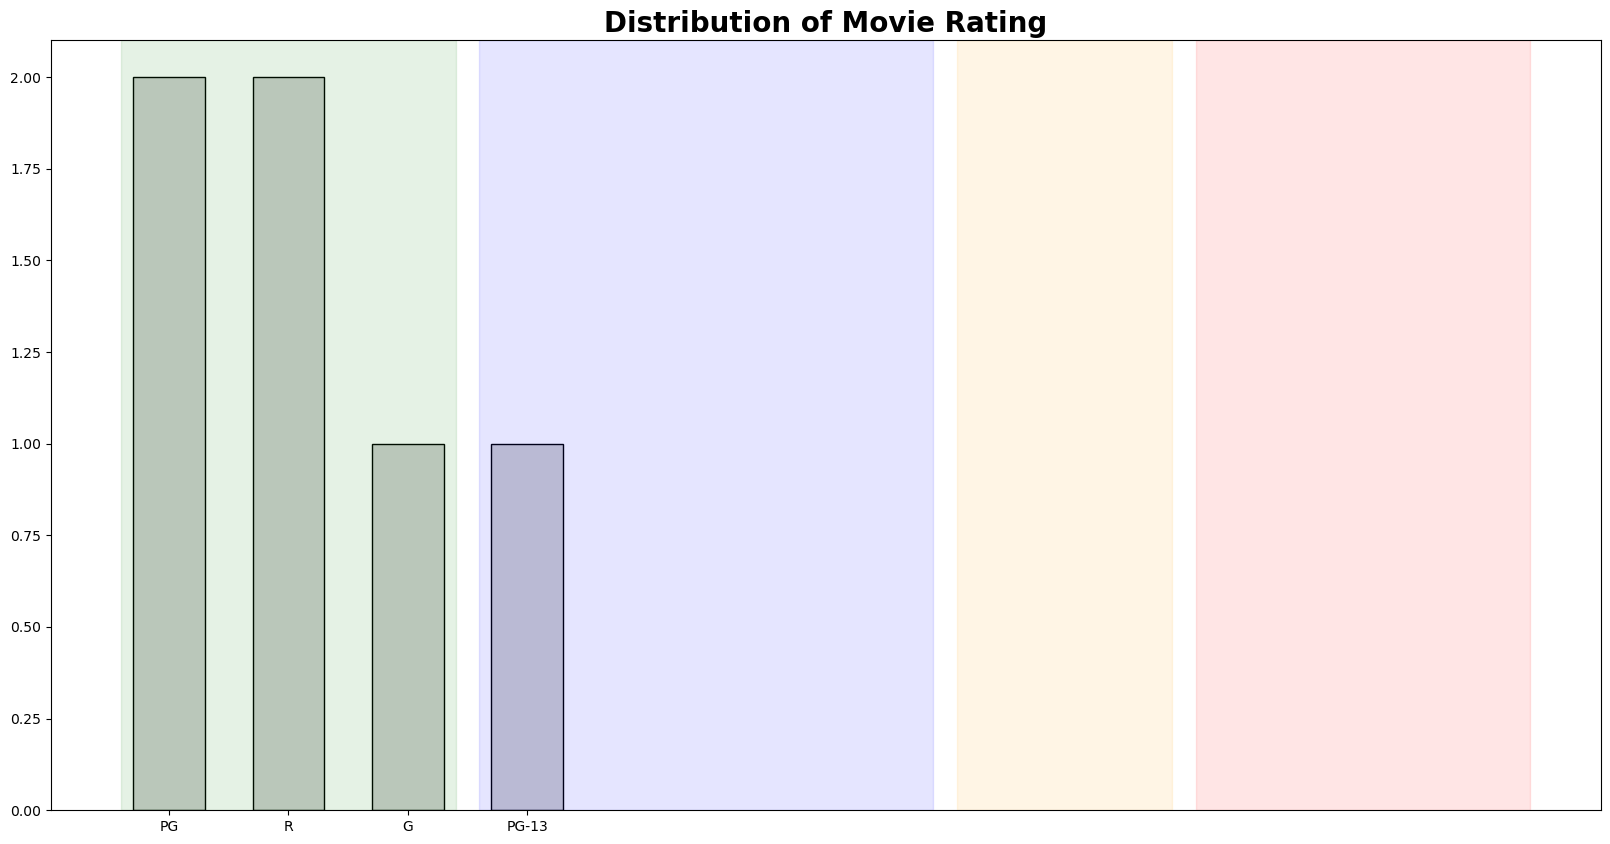

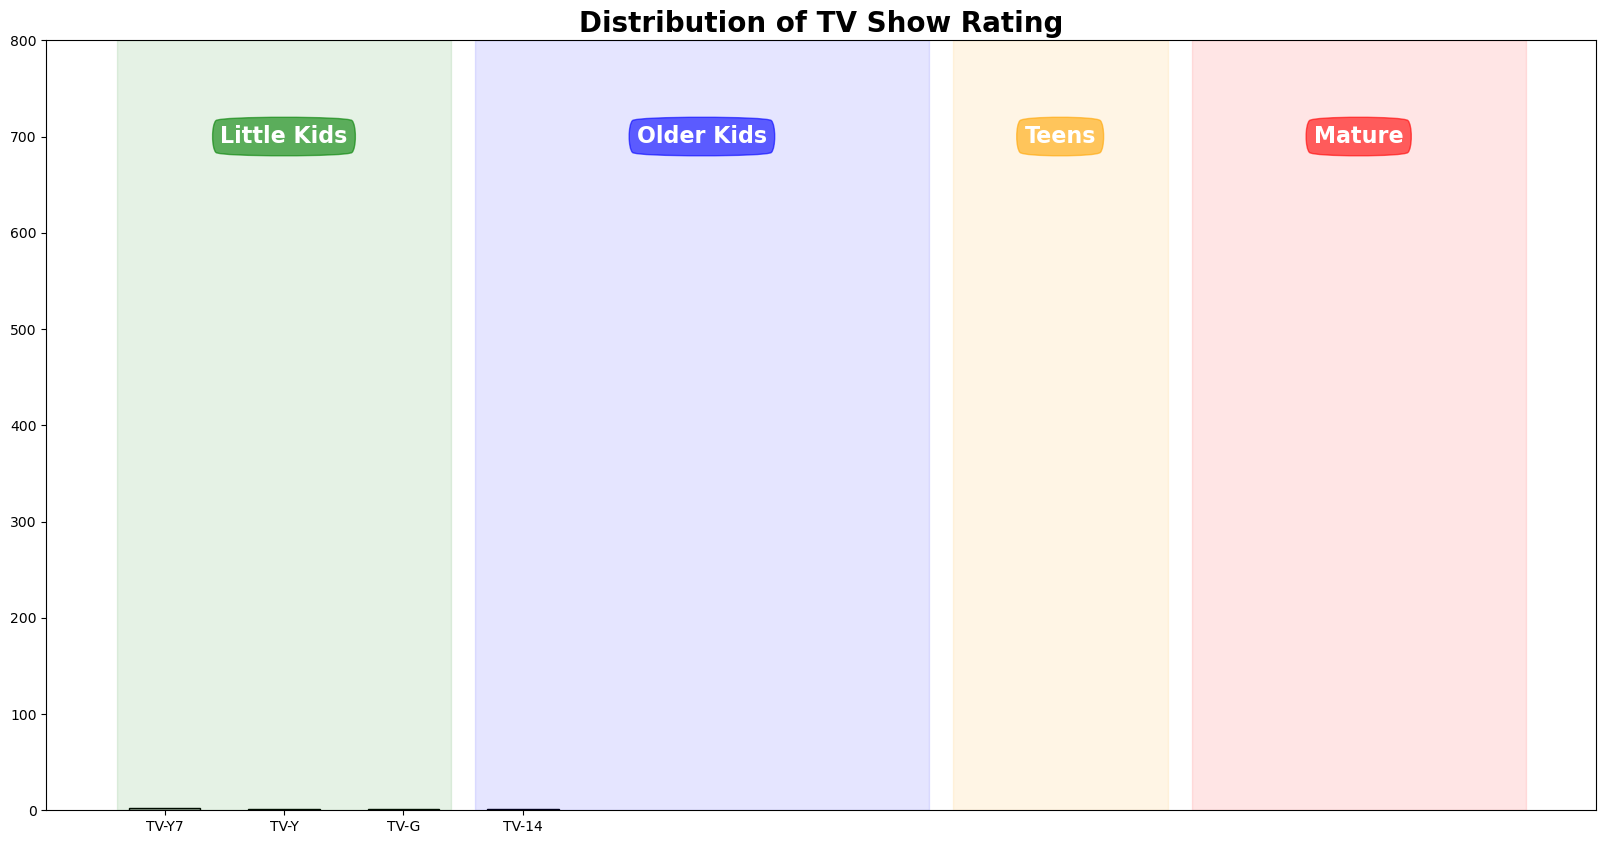

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example movie and tv_show data (replace with your actual data)
movie_data = {'rating': ['G', 'PG', 'PG', 'R', 'PG-13', 'R']}
tv_show_data = {'rating': ['TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7', 'TV-14']}

movie = pd.DataFrame(movie_data)
tv_show = pd.DataFrame(tv_show_data)

# Calculate ratings counts (assuming movie_rating and tv_rating are pandas Series)
movie_rating = movie['rating'].value_counts()
tv_rating = tv_show['rating'].value_counts()

# Function definition
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

# Example calls assuming movie_rating and tv_rating are pandas Series
rating_barplot(movie_rating, 'Movie', 1200)
rating_barplot(tv_rating, 'TV Show', 700, 800)

In [ ]:
rating_barplot
plt.show()

In [ ]:
rating_data = data[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index//12
data['tmp'] = 1
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)


color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)